## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Create the environment, value table and policy

#### Create the environment

In [2]:
env = Maze()

#### Create the $Q(s, a)$ table

In [3]:
action_values = np.zeros(shape=(5, 5, 4))

#### Create the policy $\pi(s)$

In [4]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Plot the value table $Q(s,a)$

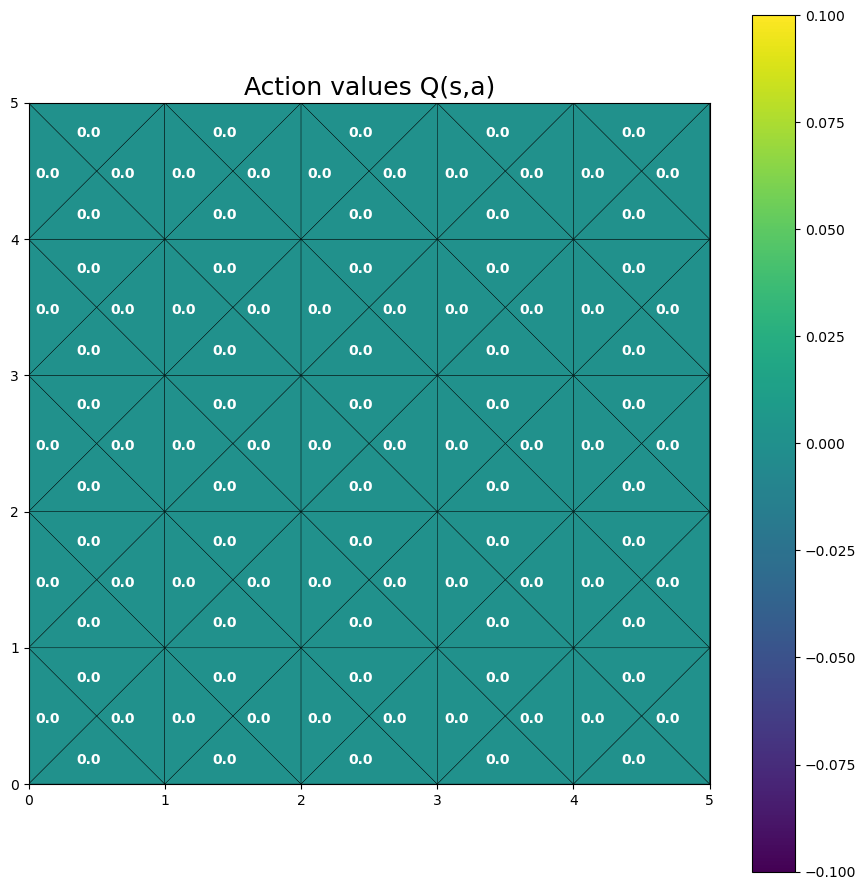

In [5]:
plot_action_values(action_values)

#### Plot the policy

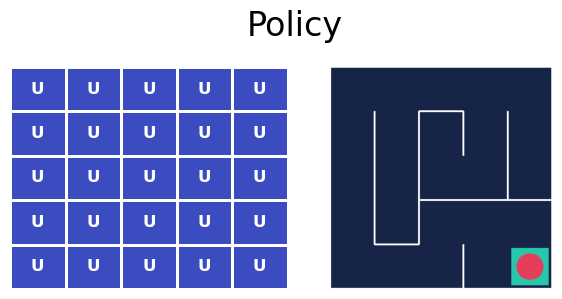

In [6]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>

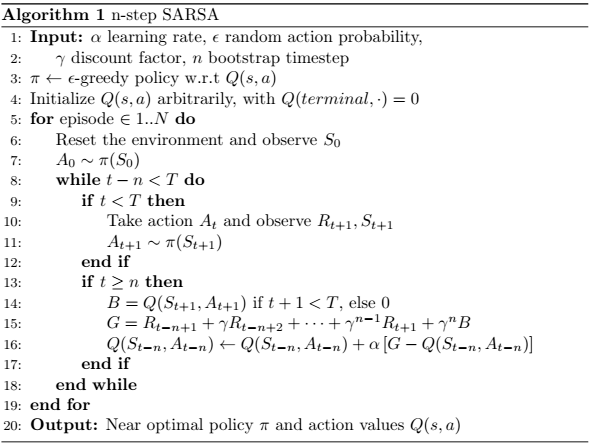

In [9]:
def n_step_sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2, n=8):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []     # a list to store the state transitions to update the q-values
        done = False
        t = 0 # moment in time 
        
        
        while t-n < len(transitions):    # to run the loop t+n-1 times
            
            # execute an action in envoironment if task is not done.
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])
                
            
            # update q-value table.
            if t >= n:
                # G = r1 + gamma * r2 + gamma^2 * r3 + .... + gamma^n * Q(Sn, An)
                G = (1 - done) * action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma * G
                    
                action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])
            
            t += 1
            state = next_state
            action = next_action
    
    
    
    # if cannot understand the code, just paste it in chatGPT
    

In [10]:
n_step_sarsa(action_values, policy, episodes=100)

## Show results

#### Show resulting value table $Q(s, a)$

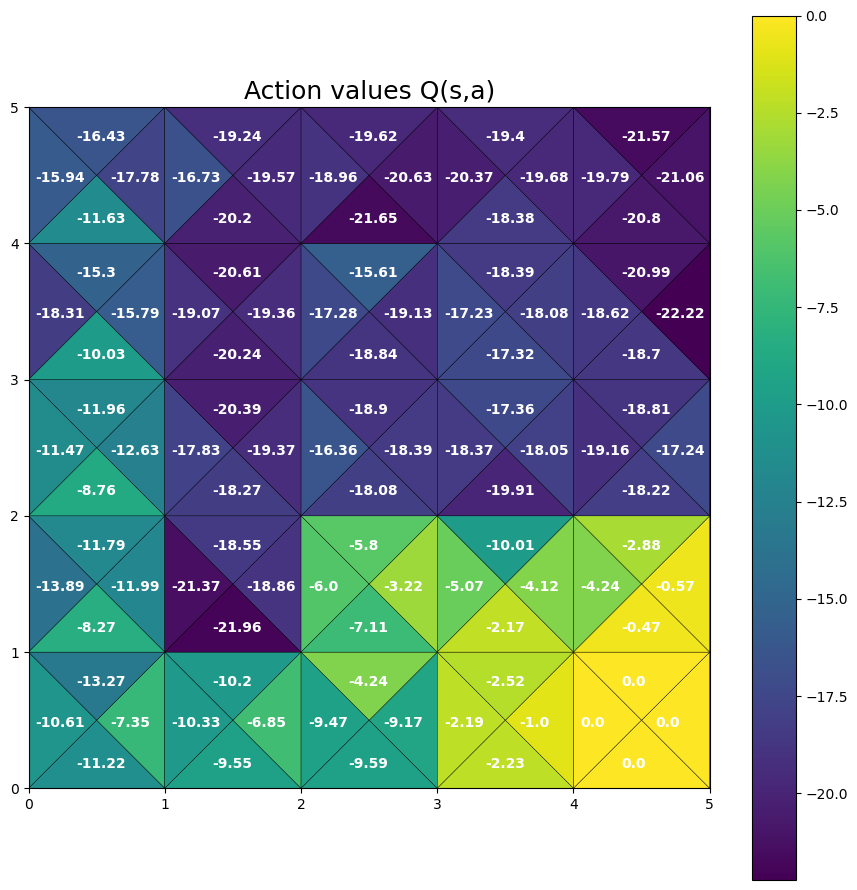

In [11]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

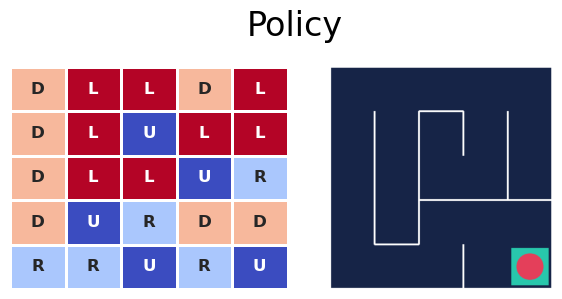

In [12]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

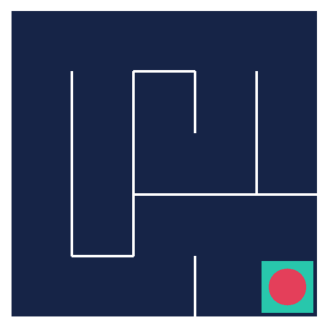

In [13]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 7: n-step bootstrapping](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)